In [23]:
with open('jazz.dat','r',encoding='utf8') as f:
    jazz_dat = f.readlines()

In [24]:
len(jazz_dat)

202

In [25]:
jazz_dat

['DL\n',
 'N=198\n',
 'FORMAT = FULLMATRIX DIAGONAL PRESENT\n',
 'DATA:\n',
 ' 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [26]:
set([len(e) for e in jazz_dat[4:]])

{397}

In [27]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [28]:
rst_list = []
for e in jazz_dat[4:]:
    tmp = e.replace("\n","")
    tmp = [e for e in tmp.split(" ") if e == '1' or e == '0']
    tmp = [int(e) for e in tmp]
    rst_list.append(tmp)

In [29]:
rst_np = np.array(rst_list)

In [30]:
rst_np.shape

(198, 198)

<IPython.core.display.Javascript object>


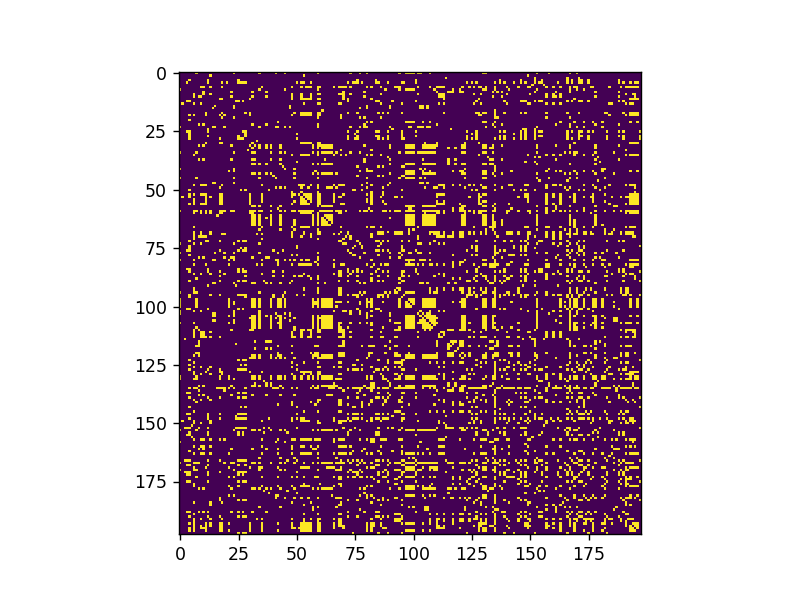

In [31]:
plt.imshow(rst_np)
plt.show()

In [35]:
nodes = []
for e in range(len(rst_list)):
    toNodes = []
    for toNode_i in range(len(rst_list[e])):
        if rst_list[e][toNode_i] == 1:
            toNodes.append(toNode_i)
    nodes.append({'id': str(e),'name': str(e),'toNodes':toNodes})

In [36]:
edges = []
now_id = 0
for i in range(len(rst_list)):
    for j in range(i,len(rst_list[0])):
        if rst_list[i][j] == 1:
            edges.append({'id':now_id,'source':str(i),'target':str(j)})
            now_id += 1

In [38]:
nodes

[{'id': '0',
  'name': '0',
  'toNodes': [7,
   23,
   34,
   41,
   45,
   59,
   73,
   77,
   80,
   94,
   97,
   98,
   99,
   100,
   102,
   103,
   107,
   130,
   131,
   153,
   158,
   167,
   170]},
 {'id': '1', 'name': '1', 'toNodes': [13, 53, 149]},
 {'id': '2', 'name': '2', 'toNodes': [114, 152, 166, 171]},
 {'id': '3',
  'name': '3',
  'toNodes': [4,
   12,
   25,
   76,
   84,
   101,
   137,
   146,
   152,
   155,
   166,
   168,
   171,
   172,
   175,
   188]},
 {'id': '4',
  'name': '4',
  'toNodes': [3,
   12,
   18,
   20,
   25,
   26,
   27,
   28,
   50,
   52,
   53,
   56,
   72,
   74,
   75,
   76,
   78,
   84,
   85,
   89,
   95,
   96,
   101,
   123,
   125,
   127,
   135,
   137,
   139,
   143,
   146,
   148,
   152,
   154,
   155,
   162,
   166,
   168,
   171,
   172,
   175,
   188,
   190,
   193,
   195,
   196]},
 {'id': '5', 'name': '5', 'toNodes': [151, 156]},
 {'id': '6',
  'name': '6',
  'toNodes': [9,
   10,
   13,
   18,
   35,
   4

In [39]:
len(edges)

2742

In [40]:
rst_json = {'nodes':nodes, 'links':edges}
import json
with open("jazz.json",'w',encoding='utf-8') as f:
    json.dump(rst_json,f)